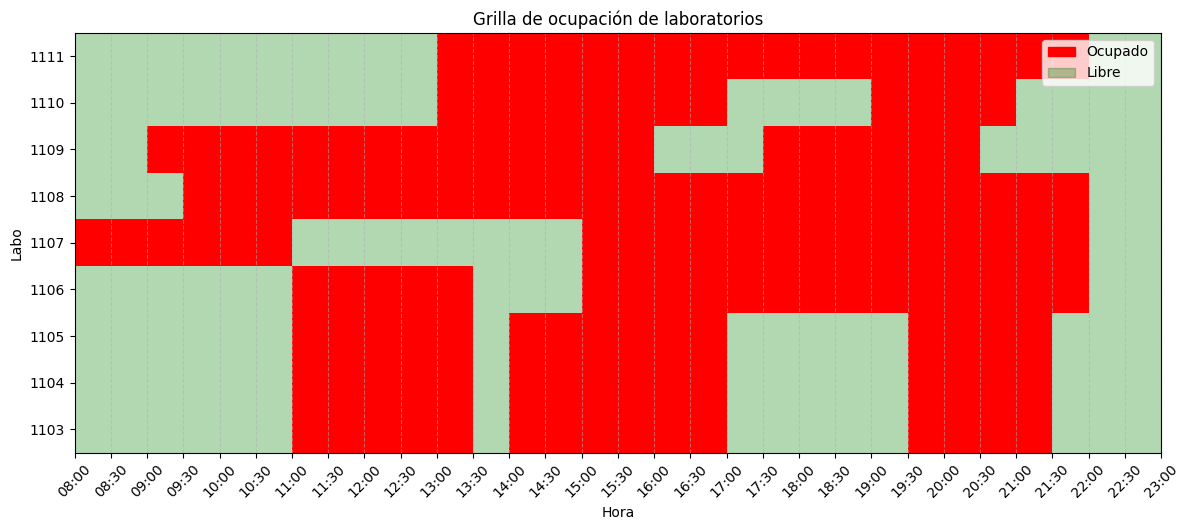

In [14]:
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import requests
from io import StringIO

url = "https://raw.githubusercontent.com/ManuUBA/Horarios-zero/main/Lunes.csv"

# Descargar el CSV como texto
respuesta = requests.get(url)
archivo_csv = StringIO(respuesta.text)

# Leer con csv.reader
filas = []
lector = csv.reader(archivo_csv, delimiter=',')
for fila in lector:
    filas.append(fila)

c_aula=-1
c_desde=-1
c_hasta=-1
c_pab=-1
for i in filas:
  j = 0
  while j < len(i):
    if i[j]=="Aula":
      c_aula=j
    if i[j]=="Inicio":
      c_desde=j
    if i[j]=="Fin":
      c_hasta=j
    if i[j]=="Pab.":
      c_pab=j
    j+=1

continuar = True
i=0
while i < len(filas) and continuar:
  if filas[i][c_aula]=="1103":
    inicio = i
    continuar = False
  i+=1

continuar = True
i=0
while i < len(filas) and continuar:
  if filas[i][c_aula]=="1112":
    fin = i
    continuar = False
  i+=1

i=inicio
labos = list(range(1103, 1112))
horarios_labo = []
while i < fin and filas[i][c_pab]=="0":
    aula = True
    horarios = []
    while filas[i][c_aula] == filas[i+1][c_aula]:
      horario = []
      horario.append(filas[i][c_desde])
      horario.append(filas[i][c_hasta])
      horarios.append(horario)
      i+=1
    horario = []
    horario.append(filas[i][c_desde])
    horario.append(filas[i][c_hasta])
    horarios.append(horario)
    horarios_labo.append(horarios)
    i+=1

# Convertir hora tipo "HH:MM" a número decimal
def hora_a_decimal(hora):
    h, m = map(int, hora.split(':'))
    return h + m/60

# Convertir decimal a hora "HH:MM"
def decimal_a_hora(dec):
    h = int(dec)
    m = int((dec - h) * 60)
    return f"{h:02d}:{m:02d}"

# Configuración de la grilla
fig, ax = plt.subplots(figsize=(12, len(horarios_labo)*0.6))
ax.set_xlim(8, 23)  # horario de 8 a 22
ax.set_ylim(0, len(horarios_labo))
ax.set_yticks([i + 0.5 for i in range(len(horarios_labo))])
ax.set_yticklabels([str(labos[i]) for i in range(len(horarios_labo))])
ax.set_xlabel("Hora")
ax.set_ylabel("Labo")

# Dibujar bloques de ocupación
for idx, aula in enumerate(horarios_labo):
    # Primero, poner toda la franja como libre (verde)
    ax.add_patch(patches.Rectangle((8, idx), 15, 1, facecolor='green', alpha=0.3))

    # Luego, marcar las ocupaciones (rojo)
    for tanda in aula:
        inicio = hora_a_decimal(tanda[0])
        fin = hora_a_decimal(tanda[1])
        ax.add_patch(patches.Rectangle((inicio, idx), fin-inicio, 1, facecolor='red'))

# Leyenda de colores
ocupado_patch = patches.Patch(color='red', label='Ocupado')
libre_patch = patches.Patch(color='green', alpha=0.3, label='Libre')
ax.legend(handles=[ocupado_patch, libre_patch], loc='upper right')

# Eje X cada media hora
marcas = [8 + 0.5*i for i in range((23-8)*2 + 1)]  # de 8 a 23 cada 0.5
ax.set_xticks(marcas)
ax.set_xticklabels([decimal_a_hora(m) for m in marcas], rotation=45)

ax.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.title("Grilla de ocupación de laboratorios")
plt.tight_layout()
plt.show()